## Running aspect planning
> - In the paper: Section 3.3
- Encoder-decoder model with conditional decoding
    - Context encoder: Abstracting (user, item, rating) into lower dimension (embedding)
    - Aspect decoder: Learning the aspect sequence given the context embedding
- Consists of three steps:
    - **Pre-processing**: prepare data
    - **Train**: learning aspect planning
    - **Test**: predicting sequences based on conditional decoding 
- Dataset: aspect, sentiment, and score information extracted `aspect_extraction`

### Pre-processing
> - The step to prepare underlying dataset
- Process pairs to serve as input and output
    - Input: context (user id, item id, and rating)
    - Output: aspect sequence as array

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os
save_dir = './data/electronics/'

In [6]:
# Sample instance
train_pairs = torch.load(os.path.join(save_dir, 'paired_train.tar'))
train_pairs[0]

[[4645, 53777, 3], ['<sos>', 'price', 'card', 'speed', '<eos>']]

### Training phase
- Input: \[user_id, item_id, rating\]
- Output: \[aspect1, aspect2, ...\]

In [ ]:
!python3 main.py --train electronics --save_dir ./data/electronics

### Testing phase

In [160]:
!python3 main.py --test electronics --save_dir ./data/electronics --model ./data/electronics/model/2_512_1024/117_aspect_planning.tar


layers, hidden, batch_size:  2 512 1024
Start loading training data ...
# train instances:  94429
testing the model "./data/electronics/model/2_512_1024/117_aspect_planning.tar"
Building encoder and decoder ...
cuda is available? 0(device id: 0) (among 8 available ones)
encoder:  cpu
Context:  A2HOXL7H84SCY6	B004UTQRHW	4
Aspects >  canon quality quality
/home/yongsu/aspect/evaluate.py:283: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  attr_input = Variable(torch.LongTensor([sentence]), volatile=True)
Evaluate with conditional_beam_decoder with beta=0.2, with weights={'coherence': 0.2, 'generality': 0.4, 'simplicity': 0.4}
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
Predicted aspects:  product product product
Context:  AU4HCPNI9LJ0U	B005VAONLQ	4
Aspects >  cables cable

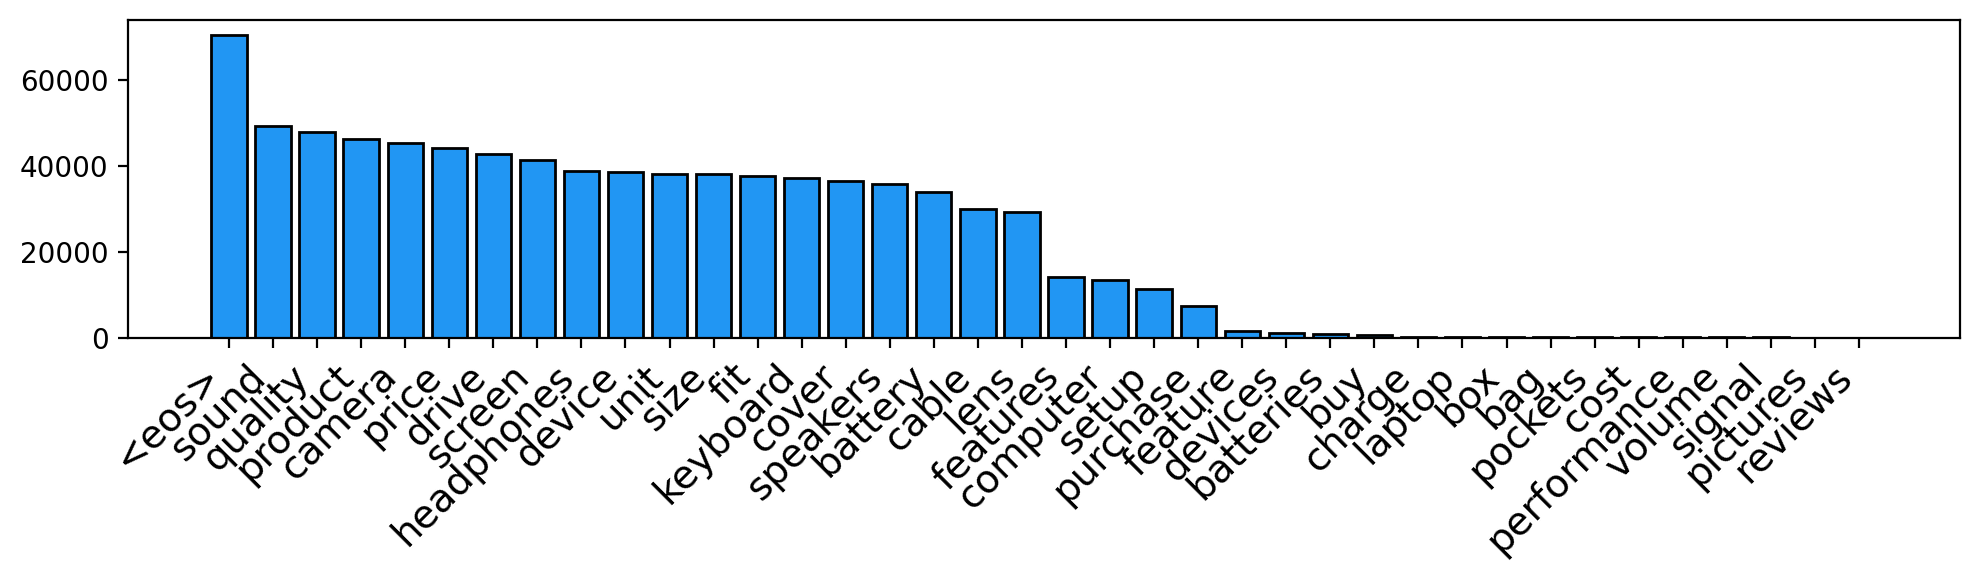

In [13]:
path = os.path.join(save_dir, 'decode/')

df_output_beam = pd.read_csv(path + 'beam_output_words_logp.csv')

word2logp_beam = {}
for idx, r in df_output_beam.iterrows():
    words = eval(r['word'])
    logp = eval(r['logp'])
    for w_idx, w in enumerate(words):
        if w != '<sos>':
            if w not in word2logp_beam.keys():
                word2logp_beam[w] = 0

            word2logp_beam[w] += logp[w_idx]
            
df_word2logp = pd.DataFrame(word2logp_beam.items(), columns=['word', 'sum_logp'])
df_word2logp.sort_values(by=['sum_logp'], ascending=False, inplace=True)

fig, ax1 = plt.subplots(1, figsize=(10,3), dpi=200)
ax1.bar(
    list(df_word2logp['word']), 
    list(df_word2logp['sum_logp']),
    align='center',
    color='#2196f3',
    edgecolor='black'
)
ax1.set_xticklabels(list(df_word2logp['word']), ha='right', rotation=45, fontsize=14)
plt.tight_layout()
plt.savefig('./figures/word2logp_beam.png')
plt.show()

#### References
The following codes were used as references in the implementation.
- Poem generation [https://github.com/shixing/poem]
- Controlling output length [https://github.com/kiyukuta/lencon]
- Comparison of diverse encoding [https://github.com/rekriz11/DeDiv]
- Importance of search and evaluation strategies [https://github.com/nyu-dl/dl4dial-bayesian-calibration]
- Synthesizing aspect-driven recommendation [https://github.com/PreferredAI/seer]
- Coarse-to-fine review generation [https://github.com/turboLJY/Coarse-to-Fine-Review-Generation/tree/master/topic]
- Diversity-promiting objectives [https://github.com/XinnuoXu/mmi_anti_pytorch]
- Beam search decoding [https://github.com/budzianowski/PyTorch-Beam-Search-Decoding